Tutorial 1: Pixelizations
=========================

To begin chapter 4, we'll begin by learning about _Pixelization_'s, which we apply to a source-plane to reconstruct a
source-galaxy's light.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

Lets setup a lensed source-plane grid, using a lens galaxy and _Tracer_ (our source galaxy doesn't have a 
_LightProfile_,as we're going to reconstruct its light using a pixelization).

In [2]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), elliptical_comps=(0.0, -0.111111), einstein_radius=1.6
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, al.Galaxy(redshift=1.0)])

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=grid)[1]

Next, lets set up a _Pixelization_using the 'pixelization' module, which is imported as 'pix' for short.

There are multiple _Pixelization_'s available in PyAutoLens. For now, we'll keep it simple and use a uniform 
rectangular grid. As usual, the grid's 'shape' defines its (y,x) dimensions.

In [3]:
rectangular = al.pix.Rectangular(shape=(25, 25))

By itself, a _Pixelization_doesn't tell us much. It has no _Grid_ of coordinates, no image, and nothing which tells it 
about the lens we're fitting. This information comes when we use the _Pixelization_to set up a _Mapper_. We'll use 
the (traced) source-plane _Grid_ to set up this mapper.

In [4]:
mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

This _Mapper_ is a 'RectangularMapper' - every _Pixelization_ generates it owns mapper.

In [5]:
print(type(mapper))

<class 'autoarray.operators.inversion.mappers.MapperRectangular'>


By plotting our mapper, we now see our _Pixelization_. Its a fairly boring _Grid_ of rectangular pixels.

(we'll cover what the 'inversion' means in a later tutorial).

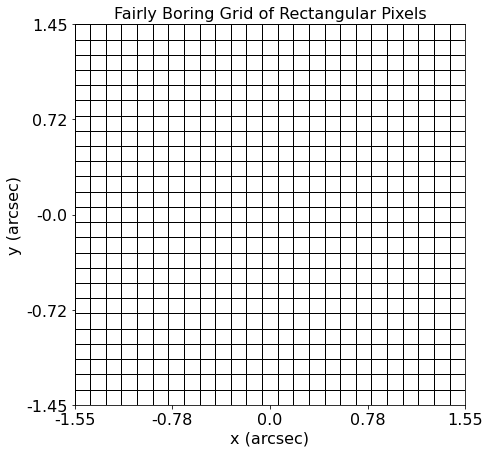

In [6]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=False, inversion_pixelization_grid=False),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Fairly Boring Grid of Rectangular Pixels")
    ),
)

However, the _Mapper_ does contain lots of interesting information about our _Pixelization_, for example its 
pixelization_grid tells us where the pixel centers are located.

In [7]:
print("Rectangular Grid Pixel Centre 1:")
print(mapper.pixelization_grid[0])
print("Rectangular Grid Pixel Centre 2:")
print(mapper.pixelization_grid[1])
print("Rectangular Grid Pixel Centre 3:")
print(mapper.pixelization_grid[2])
print("etc.")

Rectangular Grid Pixel Centre 1:
[ 1.39096745 -1.49068833]
Rectangular Grid Pixel Centre 2:
[ 1.39096745 -1.3664643 ]
Rectangular Grid Pixel Centre 3:
[ 1.39096745 -1.24224027]
etc.


Infact, we can plot these centre on our _Grid_ - to make it look slightly less boring!

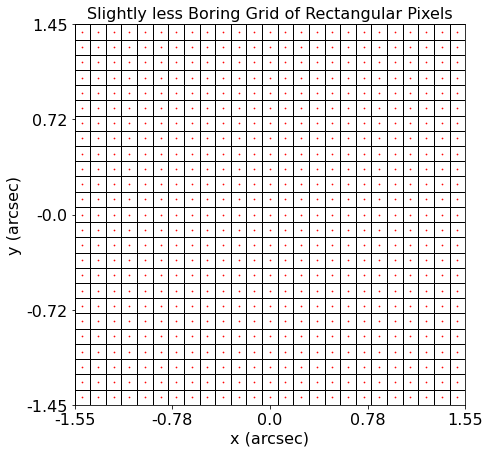

In [8]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=False, inversion_pixelization_grid=True),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Slightly less Boring Grid of Rectangular Pixels")
    ),
)

The _Mapper_ also has the (source-plane) _Grid_ that we passed when we set it up. Lets check they're the same.

In [9]:
print("Source Grid Pixel 1")
print(source_plane_grid[0])
print(mapper.grid[0])
print("Source Grid Pixel 2")
print(source_plane_grid[1])
print(mapper.grid[1])
print("etc.")

Source Grid Pixel 1
[ 1.44892442 -1.28293935]
[ 1.44892442 -1.28293935]
Source Grid Pixel 2
[ 1.44332662 -1.2635655 ]
[ 1.44332662 -1.2635655 ]
etc.


We can over-lay the _Grid_ on top. Its starting to look a bit less boring now!

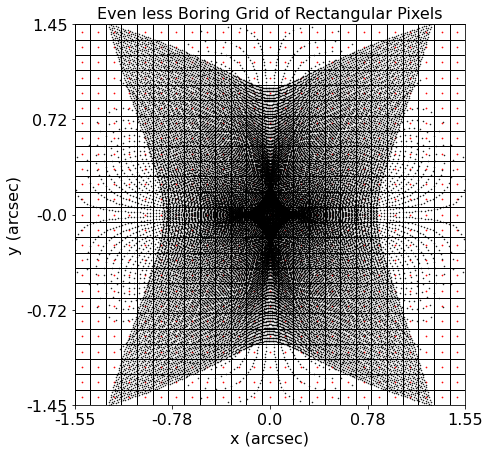

In [11]:
aplt.MapperObj(
    mapper=mapper,
    include=aplt.Include(inversion_grid=True, inversion_pixelization_grid=True),
    plotter=aplt.Plotter(
        labels=aplt.Labels(title="Even less Boring Grid of Rectangular Pixels")
    ),
)

Finally, the mapper's pixeliation_grid has lots of information about the _Pixelization_, for example, the arc-second 
size and dimensions.

In [12]:
print(mapper.pixelization_grid.shape_2d_scaled)
print(mapper.pixelization_grid.scaled_maxima)
print(mapper.pixelization_grid.scaled_minima)

(2.8978488581445028, 3.1056006772401306)
(Grid(1.44892443), Grid(1.55280034))
(Grid(-1.44892443), Grid(-1.55280034))


And with that, we're done. This was a relatively gentle overview of _Pixelization_'s, but one that was hopefully easy 
to follow.